In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Cleaning

### Making observations

In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_June_2/main/auto-mpg.csv")
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [145]:
df.shape # 389 rows and 3 columns.

(398, 9)

In [146]:
  df.columns # shows all columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car name'], dtype='object')

In [147]:
df.head() # Origin is shown as a number but it can't be a number. Have to check with the data team. # Also, car name is redundant.

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [148]:
df.describe() # includes only non categorical data.

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [149]:
df.describe(include = "float") # only floating type data.

,mpg,disp,acc
count,398.000000,398.000000,398.000000
mean,23.514573,193.425879,15.568090
std,7.815984,104.269838,2.757689
min,9.000000,68.000000,8.000000
25%,17.500000,104.250000,13.825000
50%,23.000000,148.500000,15.500000
75%,29.000000,262.000000,17.175000
max,46.600000,455.000000,24.800000


In [150]:
df.describe(include = "all")

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [152]:
df.dtypes # hp is being shown as an object, maybe some value of hp is not a number.

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [153]:
df.isnull().sum() # no empty values

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

## Problems with the data
- Car name is redundant and hence has to be removed.
- hp is supposed to be a number everywhere. Check where it went wrong. 
- Names of the origin may not be numbers.
- Origin is relevant data but it makes more sense to know the country name and forming unit vectors attributing each country. 
- No empty values : good sign.

### Objectives
- to remove the car names.
- to replace the data of origin to Asia, America, Europe.
- to make vector like entities of origin.
- To remove the question mark of hp and replace it with a floating point number.


### Data Cleaning

#### Removal of car names:

In [154]:
df.drop(['car name'], axis = 1, inplace = True)   # "inplace = true" will make sure that the dropped column will subsequently stay dropped.
df.sample(5)                                      # axis = 0 == row (by default), 1 = column

,mpg,cyl,disp,hp,wt,acc,yr,origin
43,13.0,8,400.0,170,4746,12.0,71,1
252,19.2,6,231.0,105,3535,19.2,78,1
364,26.6,8,350.0,105,3725,19.0,81,1
289,16.9,8,350.0,155,4360,14.9,79,1
290,15.5,8,351.0,142,4054,14.3,79,1


In [155]:
df.drop(columns = ['hp']) # no "inplace = true", hence we will see the hp column when df is called again.

,mpg,cyl,disp,wt,acc,yr,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1
394,44.0,4,97.0,2130,24.6,82,2
395,32.0,4,135.0,2295,11.6,82,1
396,28.0,4,120.0,2625,18.6,82,1


In [156]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### Replacing origin with countries and making vector entities:

In [157]:
df['origin'] = df['origin'].replace({1:"Europe", 2:'Asia', 3: 'America'}) # The data would still be categorical but replaced as mentioned.
df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
286,17.6,8,302.0,129,3725,13.4,79,Europe
161,16.0,6,250.0,105,3897,18.5,75,Europe
66,17.0,8,304.0,150,3672,11.5,72,Europe
253,20.5,6,200.0,95,3155,18.2,78,Europe
383,38.0,4,91.0,67,1965,15.0,82,America


In [158]:
df = pd.get_dummies(df,columns = ['origin'])  # One hot encoding # There exists no more categorical data other than hp.
df.sample(3)

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
250,19.4,8,318.0,140,3735,13.2,78,0,0,1
62,13.0,8,350.0,165,4274,12.0,72,0,0,1
70,13.0,8,400.0,190,4422,12.5,72,0,0,1


#### Replacing the question mark of hp with "some" floating point value.

In [159]:
df["hp"].replace({"?": np.nan},inplace = True) # or df['hp'].replace(to_replace = '?', value = np.nan)

In [160]:
df['hp'] = df['hp'].astype('float')

In [161]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.198492,0.175879,0.625628
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.399367,0.381197,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [162]:
df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [163]:
median = df['hp'].median()
median

93.5

In [164]:
df['hp'].replace(np.nan,median,inplace = True)

In [165]:
df.sample()

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
16,18.0,6,199.0,97.0,2774,15.5,70,0,0,1


## Simple Linear Regression 

### Sorting the independant variable and dependant variables

In [166]:
arr = np.array(df['cyl'])

In [167]:
x = arr.reshape(-1,1) # independant variable 

- Reshaping is required as the reg_model.fit(x,y) only takes up 2 dimensional entities.
- (-1,1) specifies that the array has 1 column and as many rows as required.
- dataframe has been converted to an array since a data frame can't be reshaped.

In [168]:
y = df[['mpg']] # dependant variable

In [169]:
new = df[['cyl']] # this is another short way of creating 2 dimensional entity.

### Splitting the data into training data and testing data (using x) :

In [170]:
a_train, a_test, b_train, b_test = train_test_split(new,y,test_size = 0.3,train_size = 0.5,random_state = 1)

In [171]:
b_train.count() # 0.5*398

mpg    199
dtype: int64

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) 

In [173]:
len(x_train)

278

In [174]:
y_train.count()  # 0.7*398 by default

mpg    278
dtype: int64

### Fitting the linear model

In [175]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

### Seeing the score of the model (R^2)

In [176]:
reg_model.score(x_train,y_train)

0.583783101977323

In [177]:
reg_model.score(x_test,y_test)

0.6429405757321645

### Splitting the data into training data and testing data (using new) :

In [178]:
new_train, new_test, z_train, z_test = train_test_split(new,y,test_size = 0.3, random_state = 1) # splitting data

In [179]:
reg_model_new = LinearRegression()

In [180]:
reg_model_new.fit(new_train,z_train)

LinearRegression()

In [181]:
reg_model_new.score(new_train, z_train) # same score as previous

0.583783101977323

## Multiple Linear Regression

### Sorting the independant and dependant variables:

In [182]:
b = df['mpg']

In [183]:
a = df.drop(['mpg'],axis = 1)

### Splitting the training and testing data:

In [184]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.3, random_state = 1)

### Fitting the data

In [185]:
regg_model = LinearRegression()

In [186]:
regg_model.fit(a_train,b_train)

LinearRegression()

### Getting the score of the model

In [187]:
regg_model.score(a_train,b_train)

0.814102550161056

In [188]:
regg_model.score(a_test,b_test)

0.8433135132808829

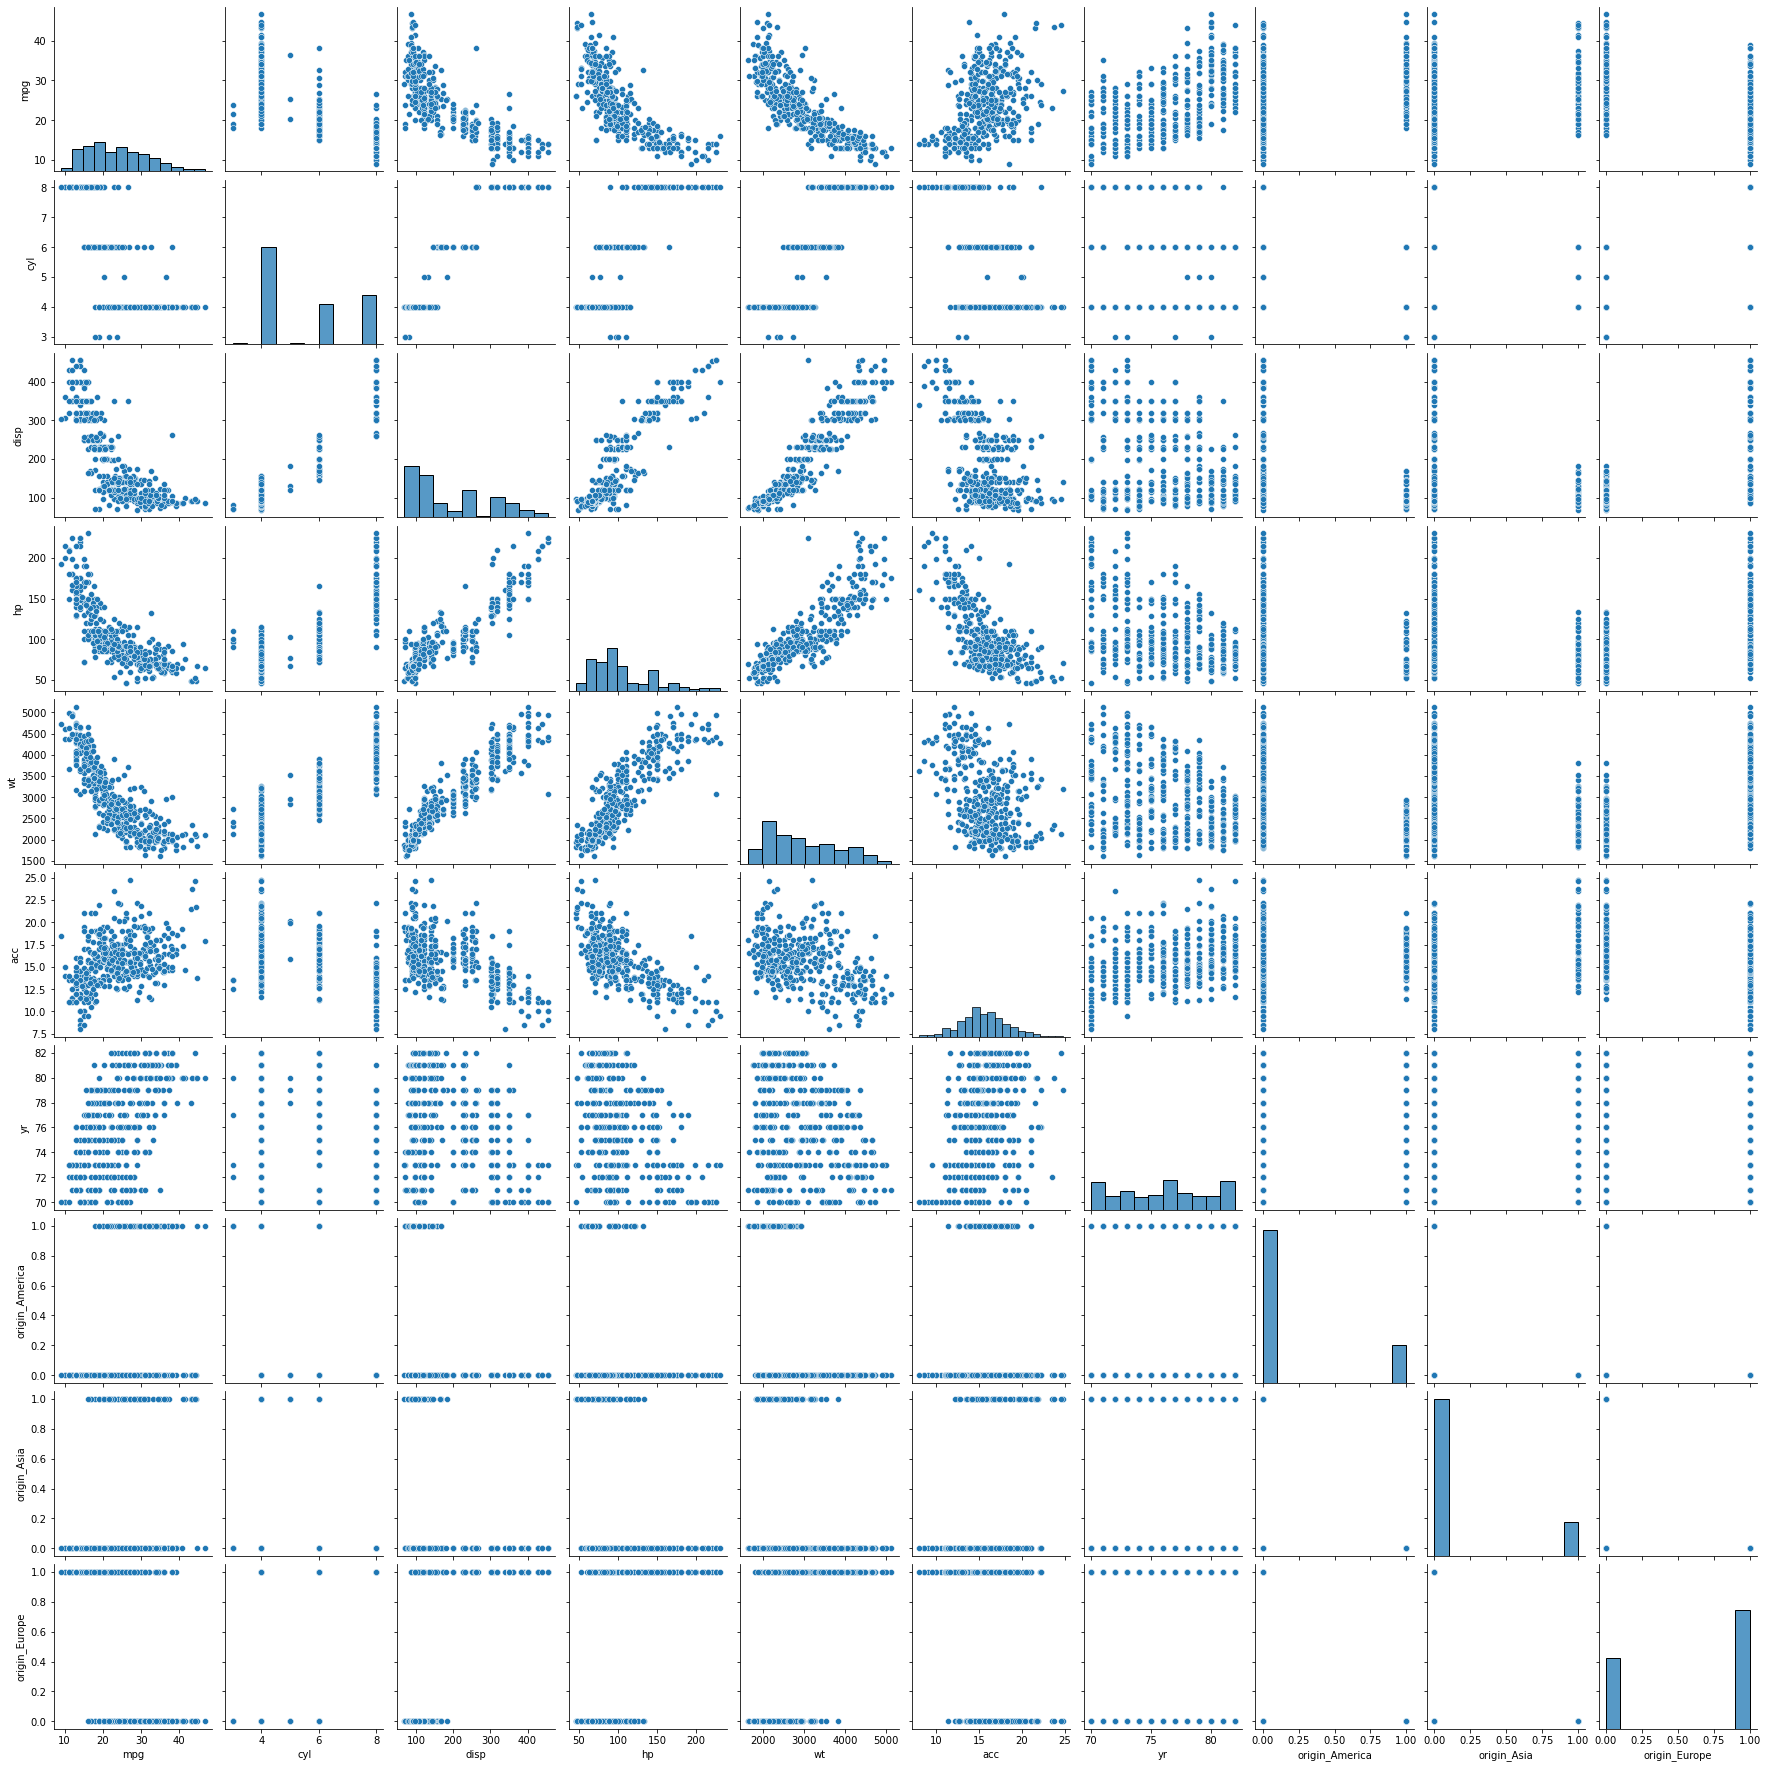

In [189]:
sns.pairplot(df)

From the above pairplot, it is evident that the variation of mpg with any of the other attributes is not so linear, making us realise that trying to get a model through linear regression was a waste of time. Anyway, we did learn a thing or two though.